# Comparison CUTonalá and PVlib forecast using RAP

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pvlib
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

In [4]:
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

In [5]:
cec_modules = pvlib.pvsystem.retrieve_sam('CECMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')

cec_module = cec_modules['Canadian_Solar_Inc__CS6X_320P']
cec_inverter = cec_inverters['INGETEAM_POWER_TECHNOLOGY_S_A___Ingecon_Sun_40TL_U_M__480V_']

In [6]:
latitude= 20.56
longitude= -103.22
altitude=1544
tz='America/Mexico_City'

In [7]:
location = Location(latitude=latitude, longitude=longitude, altitude=altitude, tz=tz)

In [8]:
surface_tilt = 25
surface_azimuth = 180 # pvlib uses 0=North, 90=East, 180=South, 270=West convention
albedo = 0.2

In [9]:
system = PVSystem(surface_tilt=surface_tilt, surface_azimuth=surface_azimuth,
                 module_parameters=cec_module,
                 inverter_parameters=cec_inverter,
                 temperature_model_parameters=temperature_model_parameters,
                 albedo=albedo, surface_type=None, module=None, 
                 module_type='glass_polymer',
                 modules_per_string=19.5, 
                 strings_per_inverter=8, inverter=None, 
                 racking_model='open_rack', 
                 losses_parameters=None, 
                 name='Name of PV system: Huerto de Cutonalá')

In [10]:
mc = ModelChain(system, location, name='Huerto de Cutonalá', 
                clearsky_model='ineichen', transposition_model='haydavies', 
                solar_position_method='nrel_numpy', airmass_model='kastenyoung1989',
                dc_model=None, #from module specifications
                ac_model='sandia', #from inverter specifications
                aoi_model='no_loss', 
                spectral_model='no_loss', #spectral model 'no loss' otherwise error
                temperature_model='sapm', losses_model='no_loss')

In [11]:
import datetime
#Variables de tiempo

start = pd.Timestamp(datetime.date.today(), tz='America/Mexico_City') # today's date
end = start + pd.Timedelta(days=7) # 7 days from today

#9 de diciebre a partir del 24 de diciembre
start9_dec = start - pd.Timedelta(days=15)
end9_dec = start9_dec + pd.Timedelta(days=1)

In [13]:
from pvlib import solarposition, irradiance, atmosphere, pvsystem, inverter, temperature, iam
from pvlib.forecast import RAP

/Users/luisvargas/Desktop/Tesis Pvlib/env_pvlib_tesis/lib/python3.8/site-packages/pvlib/forecast.py:18: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  warnings.warn(


In [14]:
fm = RAP()

In [15]:
# Se obtiene la data y se procesa del modelo de pronostico
forecast_data = fm.get_processed_data(latitude, longitude, start9_dec, end9_dec)

In [16]:
#pd.set_option('display.max_columns', None)
forecast_data.head()

,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2020-12-09 06:00:00-06:00,14.318512,0.592887,0.000000,0.000000,0.000000,19.0,0.0,18.0,10.0
2020-12-09 07:00:00-06:00,13.874878,0.854273,0.000000,0.000000,0.000000,68.0,9.0,68.0,21.0
2020-12-09 08:00:00-06:00,14.015961,0.837075,48.325425,2.872768,47.925947,55.0,7.0,55.0,0.0
2020-12-09 09:00:00-06:00,12.802277,0.883525,285.492354,583.963567,86.296579,4.0,0.0,4.0,0.0
2020-12-09 10:00:00-06:00,12.284698,0.926371,460.395205,645.864144,130.606936,10.0,1.0,10.0,0.0


In [17]:
ghi = forecast_data['ghi']
dni = forecast_data['dni']
dhi = forecast_data['dhi']
temp_air = forecast_data['temp_air']
wind_speed = forecast_data['wind_speed']
indexDF = forecast_data.index

In [18]:
weather = pd.DataFrame([dni, ghi, dhi, temp_air, wind_speed]).T

In [19]:
mc.run_model(weather)

ModelChain: 
  name: Huerto de Cutonalá
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: cec
  ac_model: snlinverter
  aoi_model: no_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [20]:
mc.dc

,i_sc,v_oc,i_mp,v_mp,p_mp,i_x,i_xx
2020-12-09 06:00:00-06:00,2.584939e-26,0.000000,2.584939e-26,0.000000,0.000000,2.584939e-26,2.584939e-26
2020-12-09 07:00:00-06:00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
2020-12-09 08:00:00-06:00,3.485615e+00,807.551679,3.286314e+00,700.582898,2302.335709,3.461112e+00,2.685442e+00
2020-12-09 09:00:00-06:00,3.132072e+01,848.787236,2.945340e+01,716.468832,21102.440256,3.109029e+01,2.264633e+01
2020-12-09 10:00:00-06:00,4.616179e+01,844.986858,4.328348e+01,700.588290,30323.899067,4.582408e+01,3.220427e+01
2020-12-09 11:00:00-06:00,5.841531e+01,840.977613,5.466899e+01,686.491834,37529.812273,5.798995e+01,3.970821e+01
2020-12-09 12:00:00-06:00,5.772858e+01,842.204182,5.404655e+01,688.196979,37194.673878,5.730761e+01,3.932596e+01
2020-12-09 13:00:00-06:00,3.864342e+01,852.769196,3.631427e+01,714.504464,25946.704471,3.835784e+01,2.750073e+01
2020-12-09 14:00:00-06:00,2.965253e+01,850.399469,2.789041e+01,719.690484,20072.462215,2.943387e+01,2.152143e+01
2020-12-09 15:00:00-06:00,4.626092e+01,841.962418,4.336293e+01,697.376999,30240.307381,4.592377e+01,3.224170e+01


In [21]:
forecast_dc = mc.dc.reset_index()
forecast_dc

,index,i_sc,v_oc,i_mp,v_mp,p_mp,i_x,i_xx
0,2020-12-09 06:00:00-06:00,2.584939e-26,0.000000,2.584939e-26,0.000000,0.000000,2.584939e-26,2.584939e-26
1,2020-12-09 07:00:00-06:00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
2,2020-12-09 08:00:00-06:00,3.485615e+00,807.551679,3.286314e+00,700.582898,2302.335709,3.461112e+00,2.685442e+00
3,2020-12-09 09:00:00-06:00,3.132072e+01,848.787236,2.945340e+01,716.468832,21102.440256,3.109029e+01,2.264633e+01
4,2020-12-09 10:00:00-06:00,4.616179e+01,844.986858,4.328348e+01,700.588290,30323.899067,4.582408e+01,3.220427e+01
5,2020-12-09 11:00:00-06:00,5.841531e+01,840.977613,5.466899e+01,686.491834,37529.812273,5.798995e+01,3.970821e+01
6,2020-12-09 12:00:00-06:00,5.772858e+01,842.204182,5.404655e+01,688.196979,37194.673878,5.730761e+01,3.932596e+01
7,2020-12-09 13:00:00-06:00,3.864342e+01,852.769196,3.631427e+01,714.504464,25946.704471,3.835784e+01,2.750073e+01
8,2020-12-09 14:00:00-06:00,2.965253e+01,850.399469,2.789041e+01,719.690484,20072.462215,2.943387e+01,2.152143e+01
9,2020-12-09 15:00:00-06:00,4.626092e+01,841.962418,4.336293e+01,697.376999,30240.307381,4.592377e+01,3.224170e+01


In [22]:
droped_forecas_data = forecast_dc.drop([0,13,14,15,16,17,18])
time = droped_forecas_data['index'].reset_index()
time = time['index']
time

0    2020-12-09 07:00:00-06:00
1    2020-12-09 08:00:00-06:00
2    2020-12-09 09:00:00-06:00
3    2020-12-09 10:00:00-06:00
4    2020-12-09 11:00:00-06:00
5    2020-12-09 12:00:00-06:00
6    2020-12-09 13:00:00-06:00
7    2020-12-09 14:00:00-06:00
8    2020-12-09 15:00:00-06:00
9    2020-12-09 16:00:00-06:00
10   2020-12-09 17:00:00-06:00
11   2020-12-09 18:00:00-06:00
Name: index, dtype: datetime64[ns, America/Mexico_City]

In [23]:
power_forecasted = droped_forecas_data['p_mp']
power_forecasted = power_forecasted.reset_index()
power_forecasted = power_forecasted['p_mp']
power_forecasted

0         0.000000
1      2302.335709
2     21102.440256
3     30323.899067
4     37529.812273
5     37194.673878
6     25946.704471
7     20072.462215
8     30240.307381
9     27204.881243
10    14455.010080
11      193.016504
Name: p_mp, dtype: float64

In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dec9_cut = pd.read_csv('./dec9.csv')

In [25]:
droped_data_cut = dec9_cut.drop([1,2,3,5,6,7,9,10,11,13,14,15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,37,38,39,41,42,43,45,46])

In [26]:
power_real = droped_data_cut['Pac(W)']
power_real = power_real.reset_index()
power_real = power_real['Pac(W)']
power_real

0       140.93
1      2729.51
2     16076.00
3     24717.43
4     31318.23
5     35039.23
6     35745.56
7     33065.44
8     28693.23
9     20638.11
10     5827.33
11      279.89
Name: Pac(W), dtype: float64

In [27]:
data_dict = {'time': time,'real_data': power_real, 'forecasted_data': power_forecasted}
dframe = pd.DataFrame(data_dict)
dframe

,time,real_data,forecasted_data
0,2020-12-09 07:00:00-06:00,140.93,0.000000
1,2020-12-09 08:00:00-06:00,2729.51,2302.335709
2,2020-12-09 09:00:00-06:00,16076.00,21102.440256
3,2020-12-09 10:00:00-06:00,24717.43,30323.899067
4,2020-12-09 11:00:00-06:00,31318.23,37529.812273
5,2020-12-09 12:00:00-06:00,35039.23,37194.673878
6,2020-12-09 13:00:00-06:00,35745.56,25946.704471
7,2020-12-09 14:00:00-06:00,33065.44,20072.462215
8,2020-12-09 15:00:00-06:00,28693.23,30240.307381
9,2020-12-09 16:00:00-06:00,20638.11,27204.881243


In [28]:
comparision = dframe.set_index('time')
comparision

,real_data,forecasted_data
time,,
2020-12-09 07:00:00-06:00,140.93,0.000000
2020-12-09 08:00:00-06:00,2729.51,2302.335709
2020-12-09 09:00:00-06:00,16076.00,21102.440256
2020-12-09 10:00:00-06:00,24717.43,30323.899067
2020-12-09 11:00:00-06:00,31318.23,37529.812273
2020-12-09 12:00:00-06:00,35039.23,37194.673878
2020-12-09 13:00:00-06:00,35745.56,25946.704471
2020-12-09 14:00:00-06:00,33065.44,20072.462215
2020-12-09 15:00:00-06:00,28693.23,30240.307381


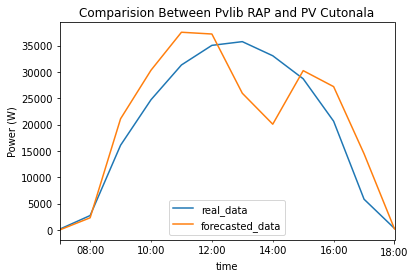

In [35]:
comparision.plot()
plt.ylabel('Power (W)')
plt.title('Comparision Between Pvlib RAP and PV Cutonala');

### RMSE

$  RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}} $

In [31]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
import numpy as np

In [32]:
real = comparision['real_data']

In [33]:
forecasted = comparision['forecasted_data']

In [34]:
print("MSE:"+str(mean_squared_error(forecasted, real)))
print("RMSE:"+str(np.sqrt(mean_squared_error(forecasted, real))))
print("MSLE:"+str(mean_squared_log_error(forecasted, real)))
print("RMSLE:"+str(np.sqrt(mean_squared_log_error(forecasted, real))))
print("MAE:"+str(mean_absolute_error(forecasted, real)))

MSE:40410417.8168876
RMSE:6356.918893370247
MSLE:2.177439260819866
RMSLE:1.4756148755077885
MAE:4932.356273343455
